<a href="https://colab.research.google.com/github/RDifault/Computer-Vision/blob/main/CV_Face_Recognition_Using_PCA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengimport seluruh libraries yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.datasets import fetch_lfw_people

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Dataset yang digunakan didapatkan dari Scikit Learn - LFW People

In [ ]:
# Hanya menggunakan orang yang memiliki setidaknya 50 foto
dataset = fetch_lfw_people(min_faces_per_person = 50, resize = 0.4)

n_samples, h, w = dataset.images.shape

X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [ ]:
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


Split Train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Membuat model PCA, kemudian apply transformasi ke kedua nilai X

In [ ]:
pca = PCA(n_components=50, whiten=True).fit(X_train)

In [ ]:
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

Melihat eigenfaces

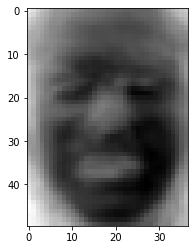

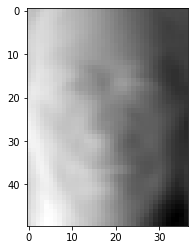

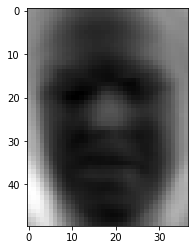

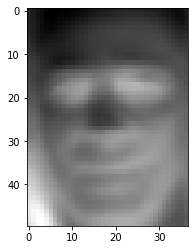

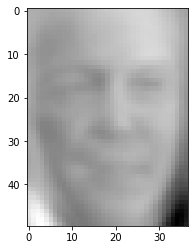

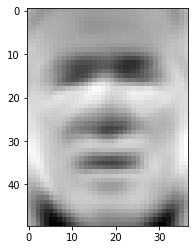

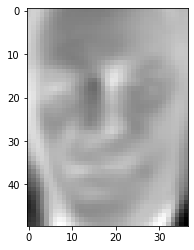

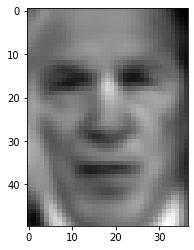

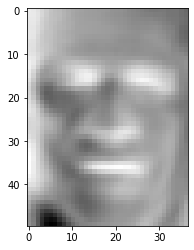

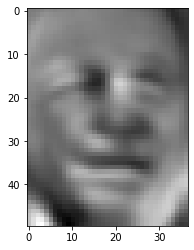

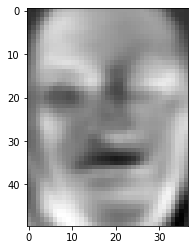

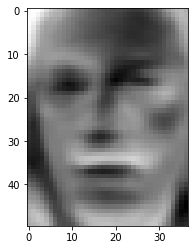

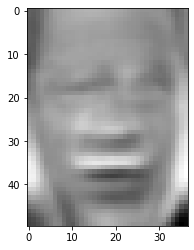

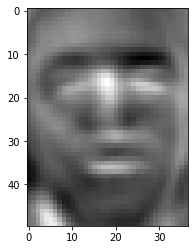

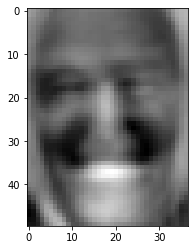

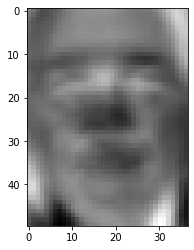

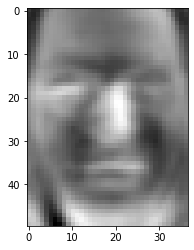

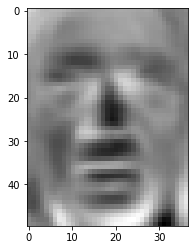

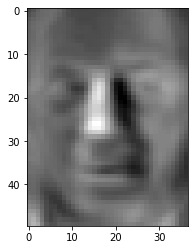

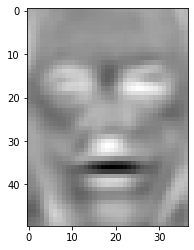

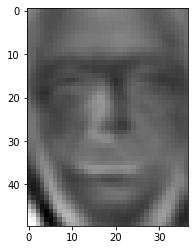

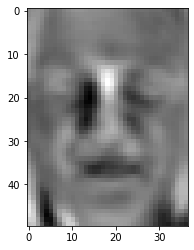

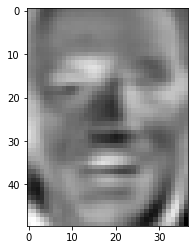

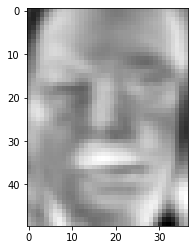

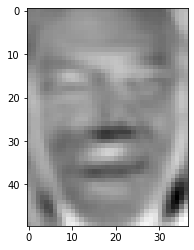

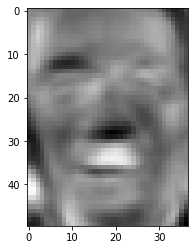

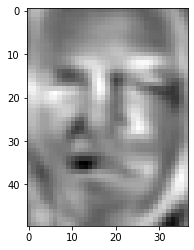

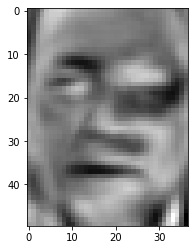

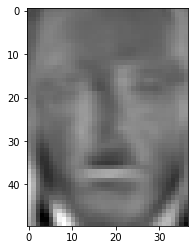

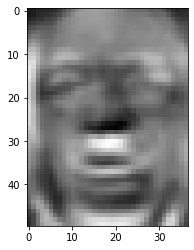

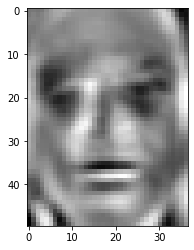

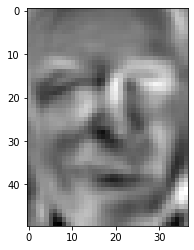

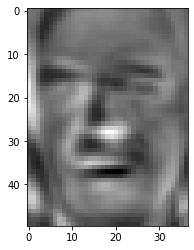

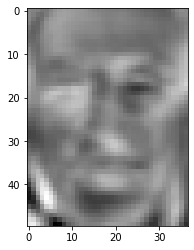

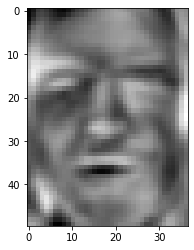

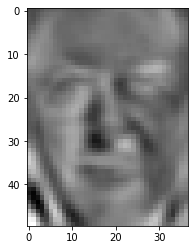

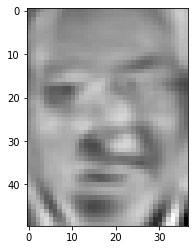

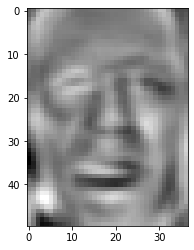

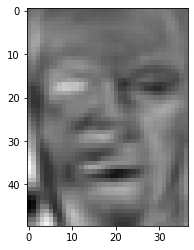

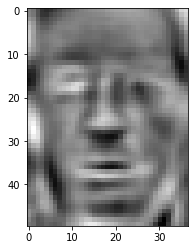

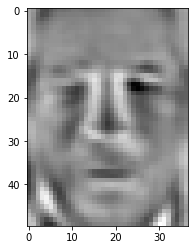

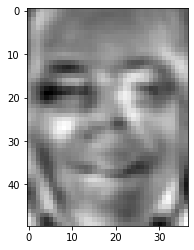

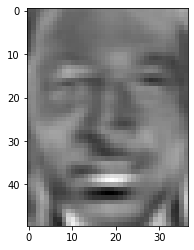

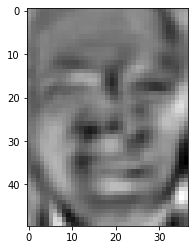

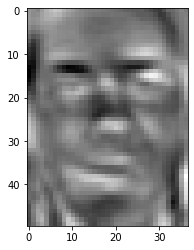

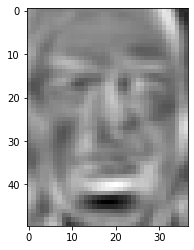

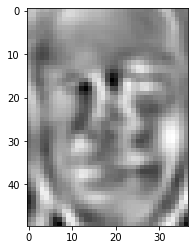

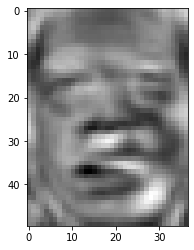

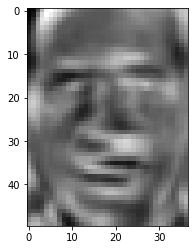

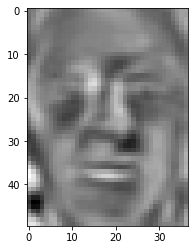

In [ ]:
eigenfaces = pca.components_.reshape((50, h, w))

for eigenface in eigenfaces:
  plt.imshow(eigenface, cmap='gray')
  plt.show()

Model SVC Fit + Prediksi

In [ ]:
clf = SVC(C=10, gamma=0.001)
clf.fit(pca_X_train, y_train)

y_pred = clf.predict(pca_X_test)

Nilai akurasi + Confusion matrix

Accuracy: 0.7724358974358975


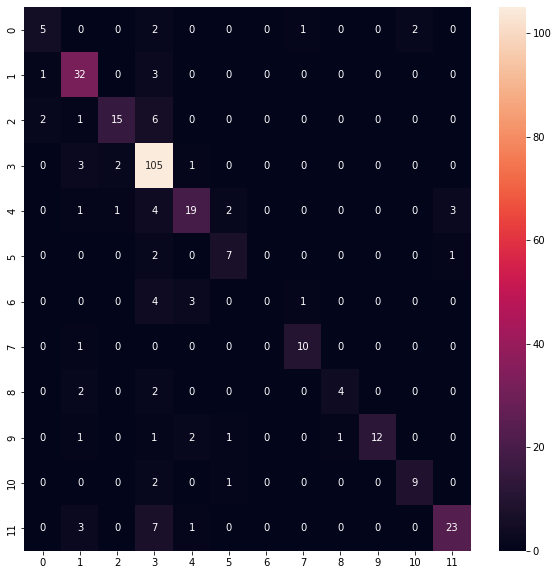

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
# print(cf_matrix)

plt.figure(figsize = (10,10))
sn.heatmap(cf_matrix, annot=True, fmt = 'd')

Print gambar, nama prediksi, dan nama sebenarnya


In [ ]:
def title(prediction, label):
  title = []
  for i in range(len(prediction)):
    string = "Prediction: " + target_names[y_pred[i]] + "\n True Name: " + target_names[y_test[i]]
    title.append(string)

  return title

def showImage(row, col, image, title):
  plt.figure(figsize=(10, 30))
  for i in range(row * col):
    plt.subplot(row, col, i + 1)
    plt.imshow(image[i].reshape((h, w)), cmap="gray")
    plt.title(title[i])

  plt.show()

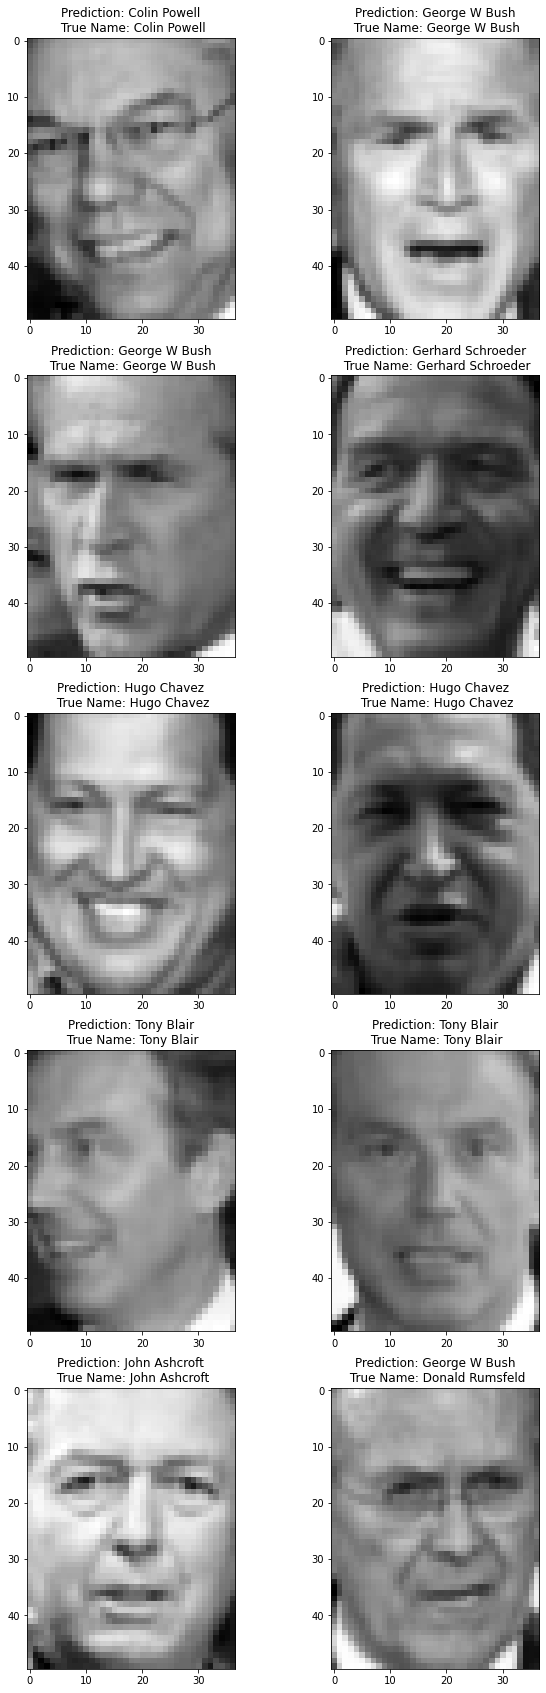

In [ ]:
showImage(5, 2, X_test, title(y_pred, y_test))